# Q(2) Assignment-05

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
tcp=pd.read_csv('F:\class hm\Toyota.csv',encoding='latin1')
tcp.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

# EDA Process

In [53]:
tcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [18]:
tcp1=pd.DataFrame(tcp.iloc[:,[2,3,6,8,12,13,15,16,17]])

In [19]:
tcp1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [39]:
tcp1=tcp1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'Q_tax','Weight':'Wt'},axis=1)
tcp1.head()

,Price,Age,KM,HP,CC,Doors,Gears,Q_tax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [54]:
print(tcp1[tcp1.duplicated()])

     Price  Age     KM   HP    CC  Doors  Gears  Q_tax    Wt
113  24950    8  13253  116  2000      5      5    234  1320


In [147]:
tcp_final=tcp1.drop_duplicates().reset_index(drop=True)
#tcp_final=tcp1.drop('index',axis='columns')
tcp_final.head()

,Price,Age,KM,HP,CC,Doors,Gears,Q_tax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [59]:
tcp_final.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Price,1435.0,10720.916,3608.733,4350.0,8450.0,9900.0,11950.0,32500.0
Age,1435.0,55.980,18.563,1.0,44.0,61.0,70.0,80.0
KM,1435.0,68571.783,37491.095,1.0,43000.0,63451.0,87041.5,243000.0
HP,1435.0,101.492,14.981,69.0,90.0,110.0,110.0,192.0
CC,1435.0,1576.561,424.388,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1435.0,4.033,0.953,2.0,3.0,4.0,5.0,5.0
Gears,1435.0,5.026,0.189,3.0,5.0,5.0,5.0,6.0
Q_tax,1435.0,87.020,40.960,19.0,69.0,85.0,85.0,283.0
Wt,1435.0,1072.287,52.252,1000.0,1040.0,1070.0,1085.0,1615.0


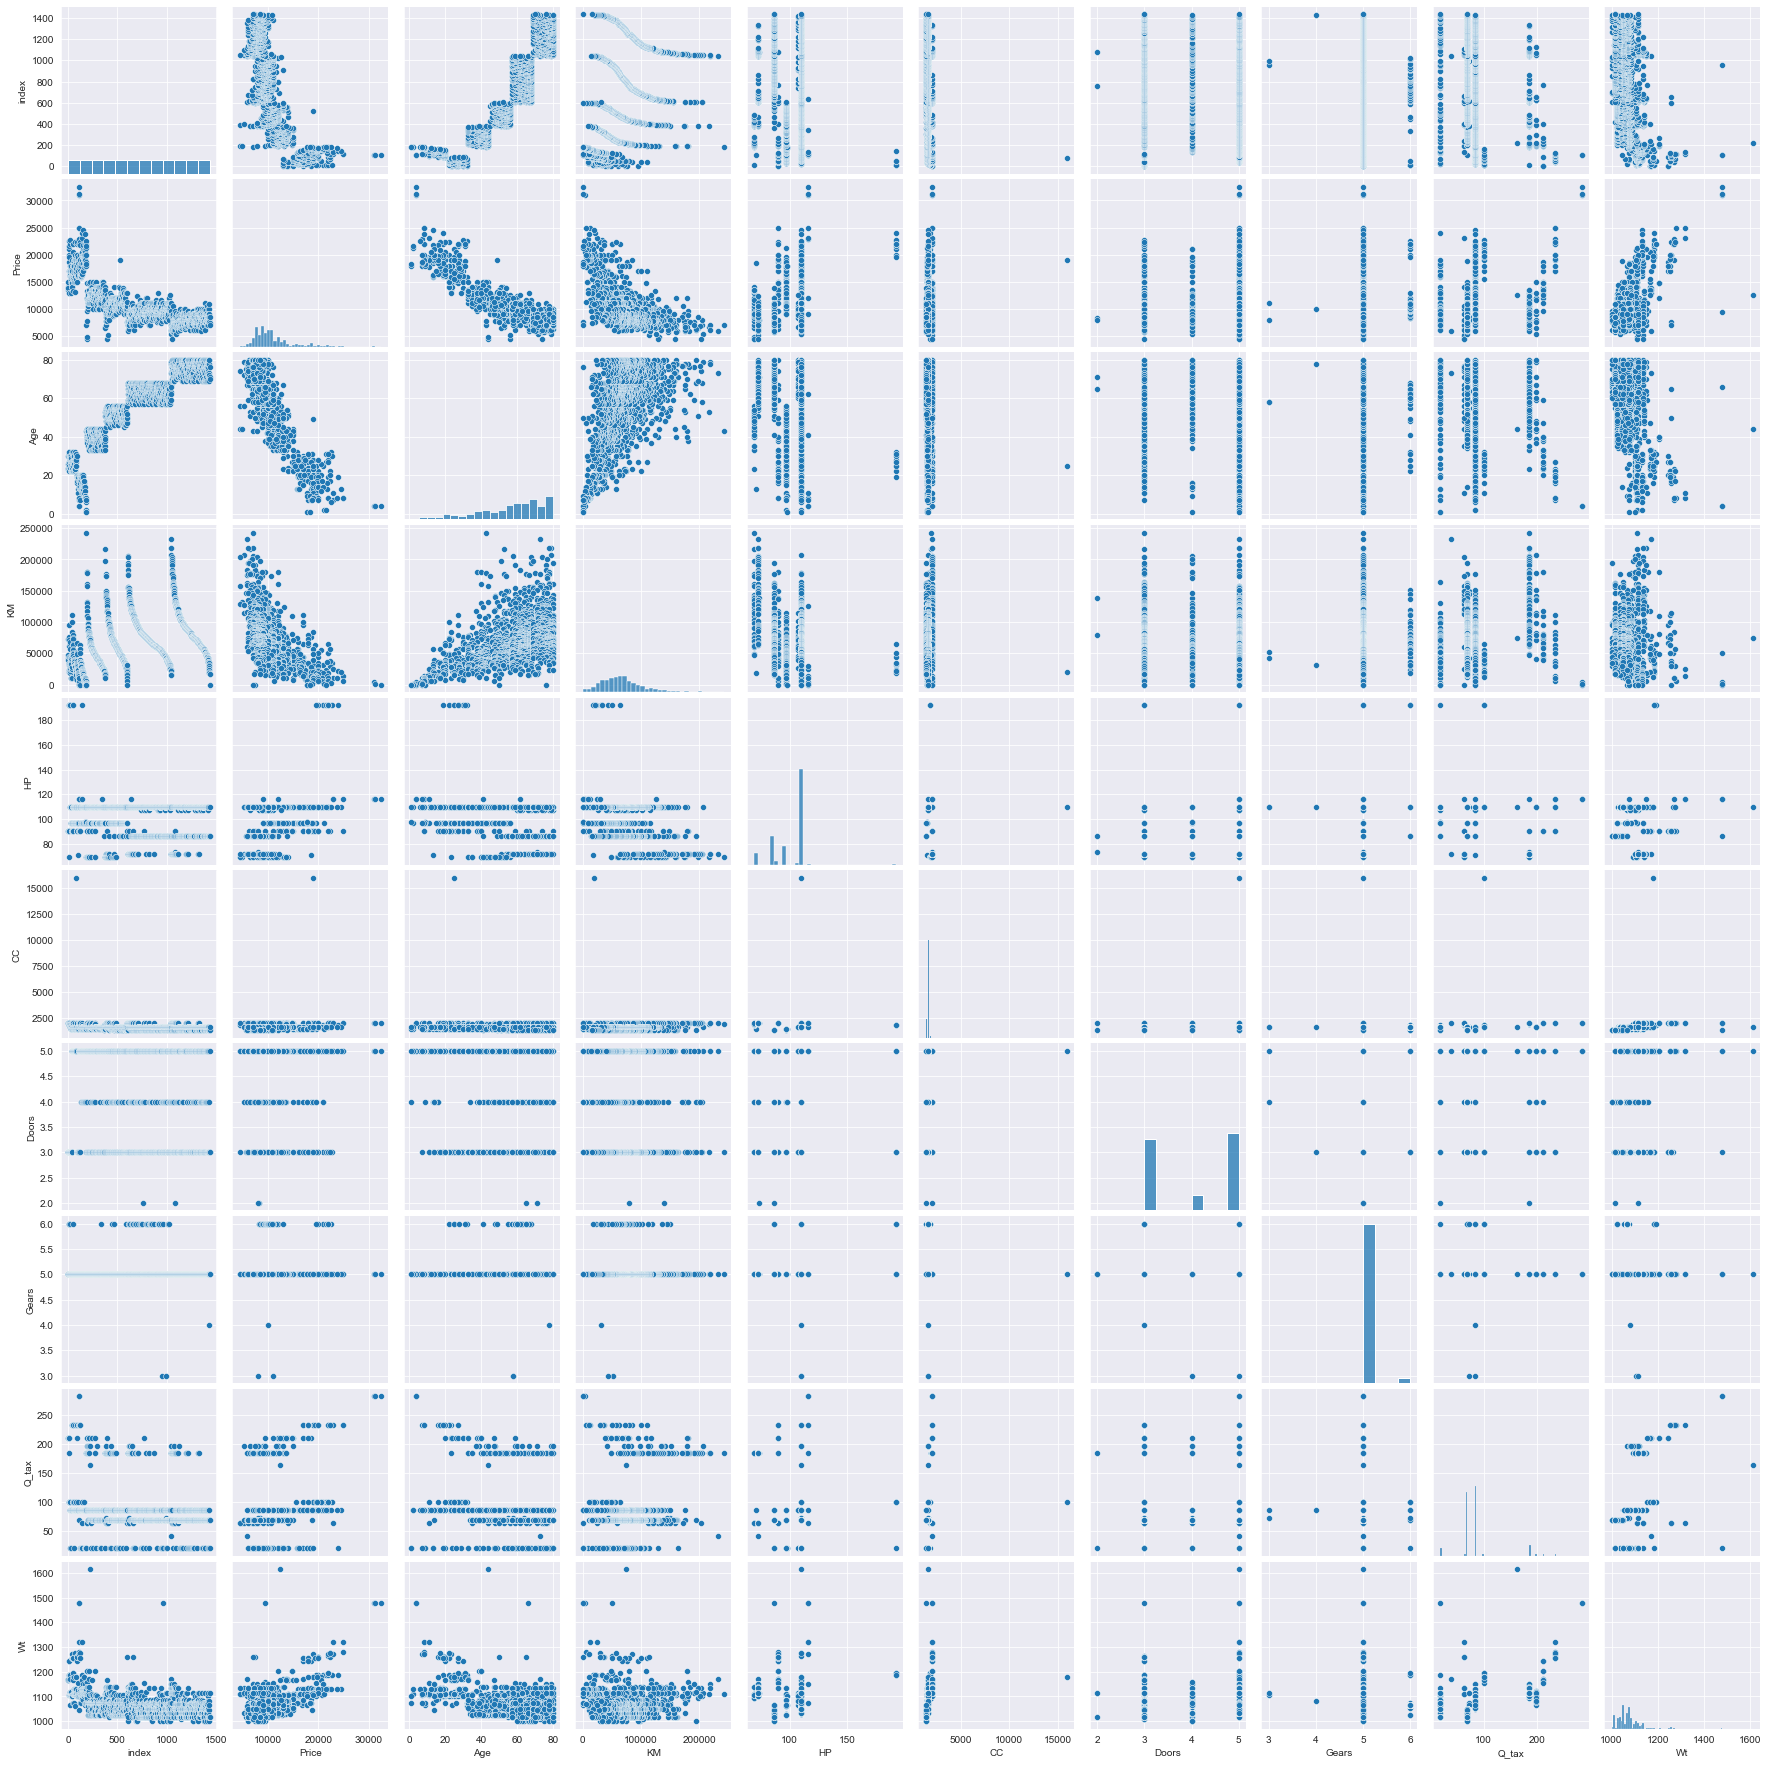

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

In [43]:
sns.set_style(style='darkgrid')
sns.pairplot(tcp_final)
plt.show()
plt.figure(figsize=(20,4))
#In the below plotted graphs shows that there are some variables which are negatively correlated and 
#the value along with the graphs are plotted below by using the heat map.

<Figure size 288x216 with 0 Axes>

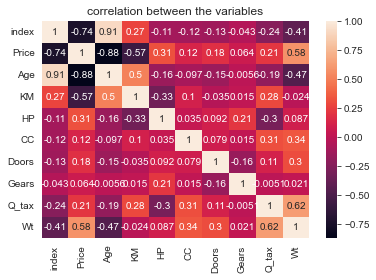

<Figure size 288x216 with 0 Axes>

In [44]:
#to know the correlation values by visualizing the heat map and along with the values 
correlations=tcp_final.corr()
sns.heatmap(correlations,annot=True).set(title='correlation between the variables')
# In the above line 'annot'=True displays the correlation values.
plt.figure(figsize=(4,3))

# Visualization

<Figure size 288x8280 with 0 Axes>

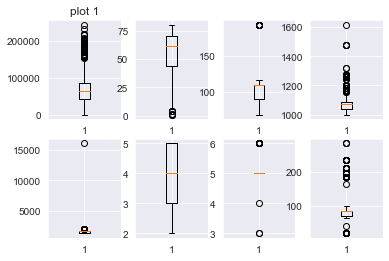

<Figure size 288x8280 with 0 Axes>

In [117]:
fig, ax = plt.subplots(nrows=2, ncols=4)
ax[0,0].set_title('plot 1')
ax[0,0].boxplot(tcp_final['KM'])
ax[0,1].boxplot(tcp_final['Age'])
ax[0,2].boxplot(tcp_final['HP'])
ax[0,3].boxplot(tcp_final['Wt'])
ax[1,0].boxplot(tcp_final['CC'])
ax[1,1].boxplot(tcp_final['Doors'])
ax[1,2].boxplot(tcp_final['Gears'])
ax[1,3].boxplot(tcp_final['Q_tax'])
plt.figure(figsize=(4,115))
#plt.boxplot(tcp_final)

In the above graph shows that values are visualizing by the colours='black' tells us that the variables are negatively correlated in the same way 'pink','purple','orange'and 'red' colours shows the correlations between variables which are having less correlation.

# Building a model 

In [60]:
tcp_final.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Q_tax', 'Wt'], dtype='object')

In [61]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Q_tax+Wt',data=tcp_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:21:15   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Q_tax          3.8588      1.311      2.944      0.003       1.288       6.430
Wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observations:
    -->In the above model we observed that the r^2 values is 0.86 that means model is some what good .
    -->but when we see the intercept and 'p' values two variables which were 'Doors' and 'cc' are affecting the model
    by assuming the signifance level of p value is greater in these variables so that we have an chance of improvement for o-ur model by checking the outliers in these variables.
    -->If p value is greater than the assumption of significance level means there should be a strong multiconearity between the independent variables by treating those columns we can improve our model to a better way for the predictions.

In [62]:
model1=smf.ols('Price~CC',data=tcp_final).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           2.29e-06
Time:                        13:38:03   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
model1=smf.ols('Price~Doors',data=tcp_final).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           2.40e-12
Time:                        13:45:04   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#From the model observed that the 'Doors' condition number is having less so that there is less collinearity compared to 'cc' variable

In [87]:
model1=smf.ols('Price~CC+Doors',data=tcp_final).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           2.55e-15
Time:                        13:49:29   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#In this model we understood that when combine both the variables together means there should be the strong multicolinearity so that we cannot use both the variables at-a-time.

# Model validation (VIF)
    --> Checking Colinearity

In [205]:
rsq_Age=smf.ols('Age~KM+HP+CC+Doors+Gears+Q_tax+Wt',data=tcp_final).fit().rsquared
vif_Age=1/(1-rsq_Age)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Q_tax+Wt',data=tcp_final).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Q_tax+Wt',data=tcp_final).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Q_tax+Wt',data=tcp_final).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_Doors=smf.ols('Doors~Age+KM+HP+CC+Gears+Q_tax+Wt',data=tcp_final).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age+KM+HP+CC+Doors+Q_tax+Wt',data=tcp_final).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Q_tax=smf.ols('Q_tax~Age+KM+HP+CC+Doors+Gears+Wt',data=tcp_final).fit().rsquared
vif_Q_tax=1/(1-rsq_Q_tax)

rsq_Wt=smf.ols('Wt~Age+KM+HP+CC+Doors+Gears+Q_tax',data=tcp_final).fit().rsquared
vif_Wt=1/(1-rsq_Wt)

# all vif values are storing in one dataframe.
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','Q_tax','Wt'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_Q_tax,vif_Wt]}
Vif_Val = pd.DataFrame(d1)  
Vif_Val

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Q_tax,2.295375
7,Wt,2.487180


# Model Deletion Diagnostics
Detecting influencers/outliers

# Cook's Distance

In [120]:
from statsmodels.graphics.regressionplots import influence_plot
model_inf=model.get_influence()
(c, _) = model_inf.cooks_distance

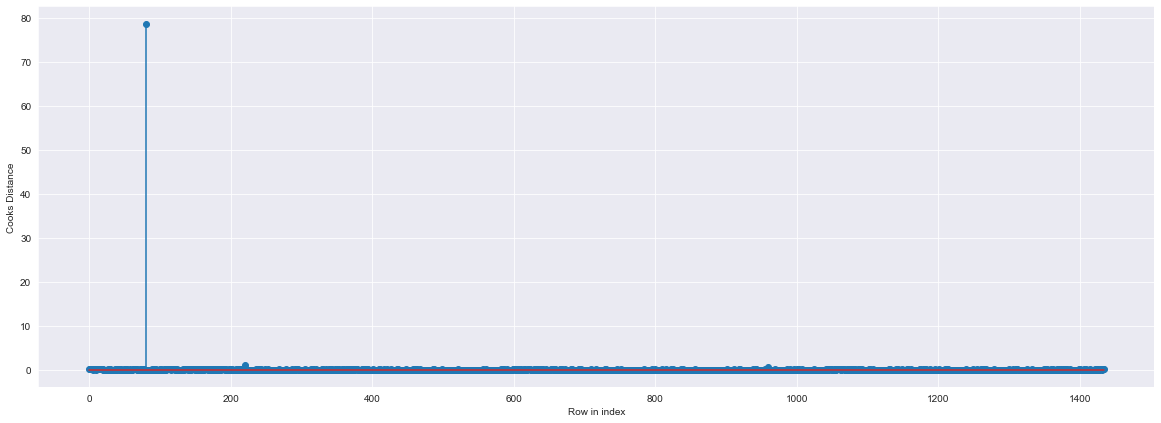

In [122]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tcp_final)),np.round(c,3))
plt.xlabel('Row in index')
plt.ylabel('Cooks Distance')
plt.show()

In [123]:
(np.argmax(c),np.max(c))

(80, 78.72950582247482)

In [125]:
tcp_final.shape

(1435, 9)

In [126]:
k = tcp_final.shape[1]
n = tcp_final.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [148]:
tcp_final[tcp_final.index.isin([80,81])]

,Price,Age,KM,HP,CC,Doors,Gears,Q_tax,Wt
80,18950,25,20019,110,16000,5,5,100,1180
81,17250,29,20000,110,1600,5,5,85,1115


In [203]:
tcp_f1=tcp_final.drop(tcp_final.index[80],axis=0).reset_index()

In [204]:
tcp_f2=tcp_f1.drop(['index'],axis=1)
tcp_f2

,Price,Age,KM,HP,CC,Doors,Gears,Q_tax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [202]:
model_final1=smf.ols('Price~Age+KM+HP+CC+Gears+Q_tax+Wt',data=tcp_final).fit()
model_final1.summary()
f'AIC:{model_f1.aic}, rsq_model2:{model_f1.rsquared}'

'AIC:24667.8233300342, rsq_model2:0.8680741306155819'

In [155]:
model_final2=smf.ols('Price~Age+KM+HP+Doors+Gears+Q_tax+Wt',data=tcp_final).fit()
f'AIC:{model_final2.aic}, rsq_model2:{model_final2.rsquared}'

'AIC:24750.150089502546, rsq_model2:0.8623529476715985'

# comparing both the model and selectiing the model which is less in 'aic' value and more in 'r2' value

In [184]:
model_f1=smf.ols('Price~Age+KM+HP+CC+Gears+Q_tax+Wt',data=tcp_f2).fit()
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1340.
Date:                Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:30:42   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6225.7366   1383.114     -4.501      0.000   -8938.893   -3512.581
Age         -120.5104      2.561    -47.058      0.000    -125.534    -115.487
KM            -0.0178      0.001    -13.986      0.000      -0.020      -0.015
HP            39.0416      2.899     13.468      0.000      33.355      44.728
CC            -2.4918      0.306     -8.135      0.000      -3.093      -1.891
Gears        552.2590    189.176      2.919      0.004     181.166     923.352
Q_tax          8.9718      1.426      6.293      0.000       6.175      11.768
Wt            19.8642      1.079     18.417      0.000      17.748      21.980
==============================================================================
Omnibus:                      235.248   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.347
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       9.408   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#model_final1 is best one then 
then again checking the influencers

In [172]:
model_inf=model.get_influence()
(c_V, _) = model_inf.cooks_distance

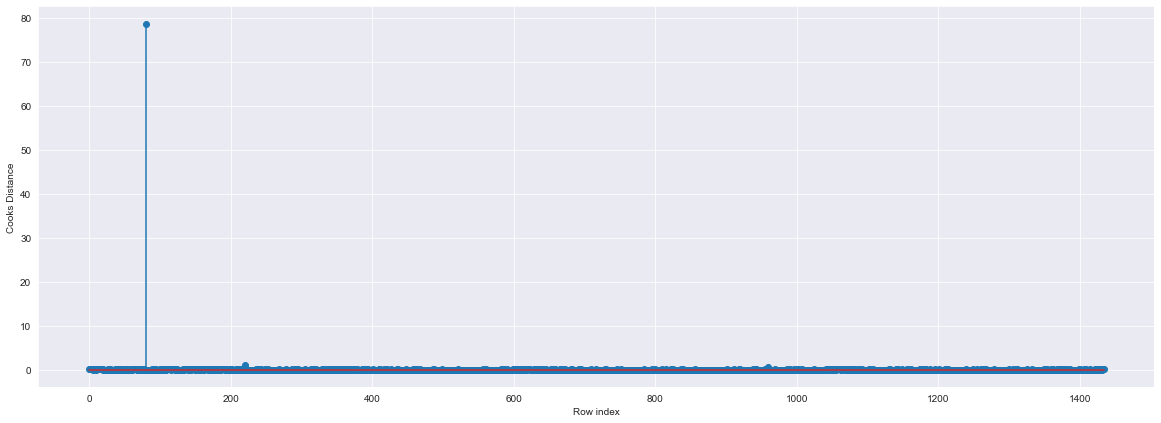

In [180]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tcp_final)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

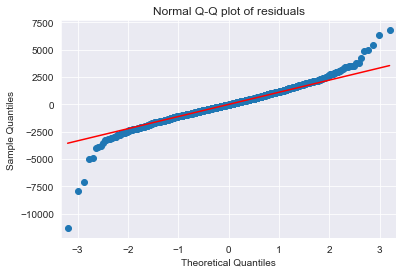

In [185]:
## 2. Residual analysis
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model_f1.resid,line='q') # line ='q'  is the 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [197]:
list(np.where(model_f1.resid<-4500))


[array([189, 190, 219, 599, 958], dtype=int64)]

In [198]:
list(np.where(model_f1.resid>4500))

[array([ 108,  145,  169,  521, 1056], dtype=int64)]

In [199]:
tcp_f2[tcp_f2.index.isin([189, 190, 219, 599, 958, 108,  145,  169,  521, 1056])]

,Price,Age,KM,HP,CC,Doors,Gears,Q_tax,Wt
108,32500,4,1,116,2000,5,5,283,1480
145,24500,13,19988,110,1600,5,5,85,1130
169,23750,8,11000,110,1600,5,5,85,1130
189,4350,44,158320,69,1800,5,5,64,1110
190,4750,44,131273,69,1800,5,5,64,1110
219,12450,44,74172,110,1600,5,5,163,1615
521,18950,49,49568,110,1600,3,5,19,1105
599,7500,50,1,90,2000,3,5,64,1260
958,9390,66,50806,86,1300,3,5,19,1480
1056,10500,77,172980,72,2000,5,5,64,1135


In [200]:
tcp_final1=tcp_f2.drop(tcp_f2.index[[189, 190, 219, 599, 958, 108,  145,  169,  521, 1056]],axis=0).reset_index(drop=True)
tcp_final1

,Price,Age,KM,HP,CC,Doors,Gears,Q_tax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1419,7500,69,20544,86,1300,3,5,69,1025
1420,10845,72,19000,86,1300,3,5,69,1015
1421,8500,71,17016,86,1300,3,5,69,1015
1422,7250,70,16916,86,1300,3,5,69,1015


In [201]:
model_final=smf.ols('Price~Age+KM+HP+CC+Gears+Q_tax+Wt',data=tcp_final1).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1660.
Date:                Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:41:02   Log-Likelihood:                -12068.
No. Observations:                1424   AIC:                         2.415e+04
Df Residuals:                    1416   BIC:                         2.419e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.485e+04   1391.308    -10.674      0.000   -1.76e+04   -1.21e+04
Age         -111.7133      2.370    -47.132      0.000    -116.363    -107.064
KM            -0.0174      0.001    -15.263      0.000      -0.020      -0.015
HP            32.9015      2.640     12.463      0.000      27.723      38.080
CC            -3.4228      0.288    -11.875      0.000      -3.988      -2.857
Gears        622.0575    167.709      3.709      0.000     293.073     951.042
Q_tax          4.1913      1.339      3.129      0.002       1.564       6.819
Wt            29.4387      1.208     24.380      0.000      27.070      31.807
==============================================================================
Omnibus:                       17.087   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.128
Skew:                          -0.000   Prob(JB):                     7.80e-07
Kurtosis:                       3.689   Cond. No.                     3.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
model_final.predict(tcp_final)

0       16163.248566
1       15711.387766
2       16143.384012
3       15810.452947
4       15676.208081
            ...     
1430     9036.835782
1431     8434.193385
1432     8580.452202
1433     8693.906667
1434    10785.799731
Length: 1435, dtype: float64